In [2]:
import pandas as pd

# Importa cada CSV separadamente
leitos_2023 = pd.read_csv("Leitos_2023.csv", encoding="latin-1")
leitos_2024 = pd.read_csv("Leitos_2024.csv", encoding="latin-1")
leitos_2025 = pd.read_csv("Leitos_2025.csv", sep=";", encoding="latin-1")

# Adiciona uma coluna para indicar o ano (se o CSV não tiver)
leitos_2023["Ano"] = 2023
leitos_2024["Ano"] = 2024
leitos_2025["Ano"] = 2025

# Junta tudo em um único DataFrame
leitos = pd.concat([leitos_2023, leitos_2024, leitos_2025], ignore_index=True)

# Mostra o resultado
display(leitos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219870 entries, 0 to 219869
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COMP                    219870 non-null  int64  
 1   REGIAO                  219870 non-null  object 
 2   UF                      219870 non-null  object 
 3   MUNICIPIO               219870 non-null  object 
 4   MOTIVO_DESABILITACAO    0 non-null       float64
 5   CNES                    219870 non-null  int64  
 6   NOME_ESTABELECIMENTO    219868 non-null  object 
 7   RAZAO_SOCIAL            219870 non-null  object 
 8   TP_GESTAO               219870 non-null  object 
 9   CO_TIPO_UNIDADE         219870 non-null  int64  
 10  DS_TIPO_UNIDADE         219870 non-null  object 
 11  NATUREZA_JURIDICA       219870 non-null  int64  
 12  DESC_NATUREZA_JURIDICA  219870 non-null  object 
 13  NO_LOGRADOURO           219870 non-null  object 
 14  NU_ENDERECO         

None

In [3]:
#Separar ano e mês a partir da coluna COMP
leitos["Ano"] = leitos["COMP"].astype(str).str[:4].astype(int)
leitos["Mes"] = leitos["COMP"].astype(str).str[4:6].astype(int)

In [9]:
#Selecionar só as colunas relevantes para análise
#Exemplo: REGIAO, UF, MUNICIPIO, Ano, Mes, e as colunas de leitos (UTI_ADULTO_EXIST, UTI_PEDIATRICO_EXIST

resumo = leitos.groupby(["Ano", "REGIAO"])[
    ["UTI_ADULTO_EXIST", "UTI_PEDIATRICO_EXIST", "UTI_NEONATAL_EXIST", "UTI_QUEIMADO_EXIST", "UTI_CORONARIANA_EXIST"]
].sum().reset_index()

display(resumo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Ano                    15 non-null     int64 
 1   REGIAO                 15 non-null     object
 2   UTI_ADULTO_EXIST       15 non-null     int64 
 3   UTI_PEDIATRICO_EXIST   15 non-null     int64 
 4   UTI_NEONATAL_EXIST     15 non-null     int64 
 5   UTI_QUEIMADO_EXIST     15 non-null     int64 
 6   UTI_CORONARIANA_EXIST  15 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 972.0+ bytes


None

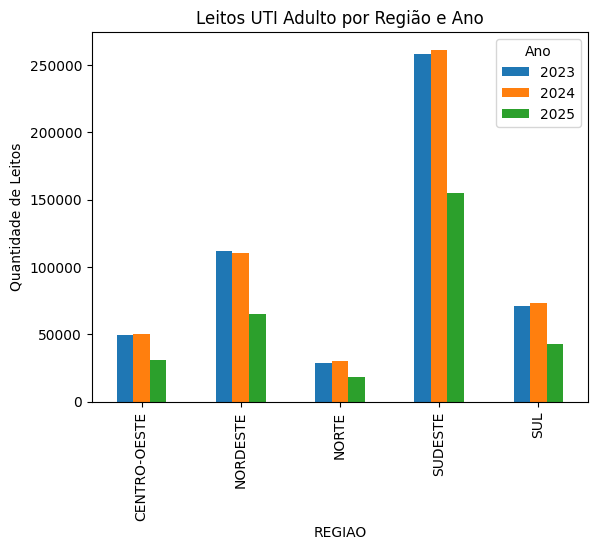

In [8]:
import matplotlib.pyplot as plt

resumo.pivot(index="REGIAO", columns="Ano", values="UTI_ADULTO_EXIST").plot(kind="bar")
plt.title("Leitos UTI Adulto por Região e Ano")
plt.ylabel("Quantidade de Leitos")
plt.show()
